In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree.export import export_text

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
TB_SA = pd.read_csv('data/tb_sa.csv')

In [3]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.style.use('seaborn-colorblind')
plt.ion()

### Quarta pergunta: É possível traçar um perfil entre a quantidade de novos casos ou casos de reinfecção e a cobertura de tratamento?

Vamos agora classificar os países em grupos de eficácia de acordo com os grupos citados na pergunta anterior, e tentar usar uma KNN para encontrar um perfil entre as duas variáveis.

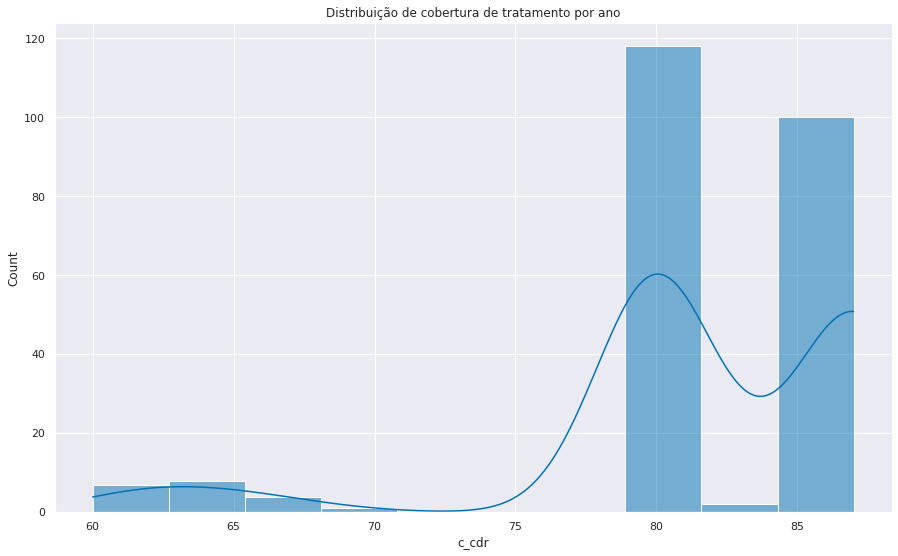

In [11]:
sns.histplot(TB_SA['c_cdr'], bins=10, kde=True)
plt.title('Distribuição de cobertura de tratamento por ano')
plt.show()

In [18]:
def get_classe(cdr):
  if cdr < 70:
    return 'low'
  elif cdr <= 80:
    return 'medium'
  else:
    return 'high'

In [28]:
knn_f1_results = []
for i in range(5000):
    # Classificar cada país/ano por cobertura de tratamento
    TB_SA['classe'] = TB_SA['c_cdr'].map(get_classe)
    cobertura_tratamento = TB_SA[['country', 'c_newinc_100k', 'classe']]

    # Separando dados de teste e treino
    y = cobertura_tratamento['classe']
    X = cobertura_tratamento.drop(['country', 'classe'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Treinando
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    knn_f1_results.append(f1_score(y_test, y_pred, average='weighted'))
print('Last iteration results:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

print('F1:', f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Last iteration results:
[[20  0  8]
 [ 0  0  3]
 [ 9  3 17]]
              precision    recall  f1-score   support

        high       0.69      0.71      0.70        28
         low       0.00      0.00      0.00         3
      medium       0.61      0.59      0.60        29

    accuracy                           0.62        60
   macro avg       0.43      0.43      0.43        60
weighted avg       0.62      0.62      0.62        60

F1: 0.6157894736842106


In [33]:
knn_f1_results = np.array(knn_f1_results)
knn_mean = knn_f1_results.sum()/len(knn_f1_results)
knn_mean

0.6314552734624038

In [30]:
tree_f1_results = []
for i in range(5000):
    # Classificar cada país/ano por cobertura de tratamento
    TB_SA['classe'] = TB_SA['c_cdr'].map(get_classe)
    cobertura_tratamento = TB_SA[['country', 'c_newinc_100k', 'classe']]

    # Separando dados de teste e treino
    y = cobertura_tratamento['classe']
    X = cobertura_tratamento.drop(['country', 'classe'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Treinando
    classifier = tree.DecisionTreeClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    tree_f1_results.append(f1_score(y_test, y_pred, average='weighted'))
print('Last iteration results:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

print('F1:', f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Last iteration results:
[[18  0  7]
 [ 0  2  3]
 [ 7  3 20]]
              precision    recall  f1-score   support

        high       0.72      0.72      0.72        25
         low       0.40      0.40      0.40         5
      medium       0.67      0.67      0.67        30

    accuracy                           0.67        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.67      0.67      0.67        60

F1: 0.6666666666666666


In [34]:
tree_f1_results = np.array(tree_f1_results)
tree_mean = tree_f1_results.sum()/len(tree_f1_results)
tree_mean

0.6350336606658016

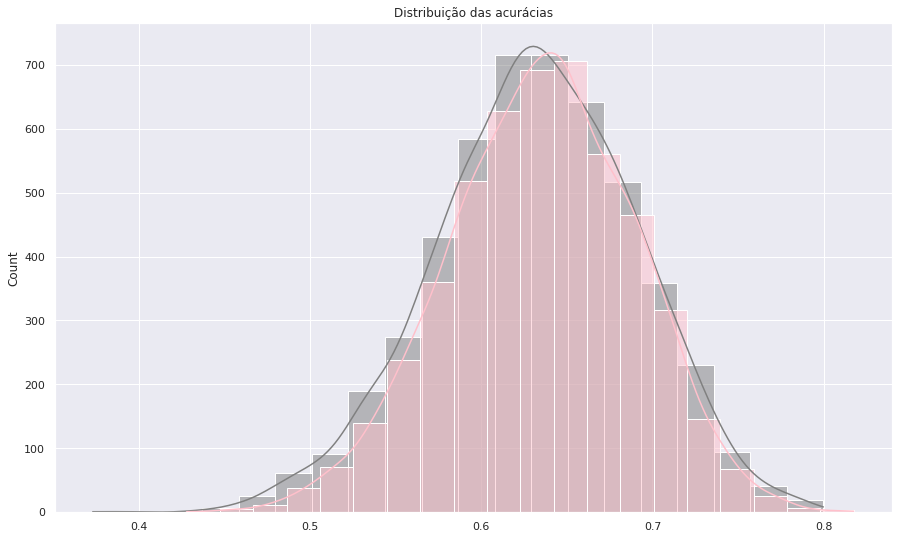

In [38]:
sns.histplot(knn_f1_results, bins=20, kde=True, label='Acurácia KNN', color='Grey')
sns.histplot(tree_f1_results, bins=20, kde=True, label='Acurácia Decision Tree', color='Pink')
plt.title('Distribuição das acurácias')
plt.show()